In [5]:
# from google.colab import drive
# drive.mount("/content/drive")

# import os
# os.chdir('/content/drive/MyDrive/根據區域微氣候資料預測發電量競賽')

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
# 讀取資料
df1 = pd.read_csv('L8_Train.csv')
df2 = pd.read_csv('L8_Train_2.csv')
print("Shape of df1:", df1.shape)
print("Shape of df2:", df2.shape)

Shape of df1: (116999, 8)
Shape of df2: (22671, 8)


In [ ]:
# 合併處理
df = pd.concat([df1, df2], ignore_index=True)
df

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,8,2024-01-06 06:21:19.000,0.0,1016.10,14.67,80.94,23.33,0.00
1,8,2024-01-06 06:22:19.000,0.0,1016.10,14.65,80.95,25.83,0.00
2,8,2024-01-06 06:23:19.000,0.0,1016.07,14.63,81.00,30.83,0.00
3,8,2024-01-06 06:24:19.000,0.0,1016.02,14.61,81.02,35.00,0.00
4,8,2024-01-06 06:25:19.000,0.0,1016.06,14.60,81.07,41.67,0.00
...,...,...,...,...,...,...,...,...
139665,8,2024-10-30 14:26:23.000,0.0,1001.96,28.65,100.00,3249.17,2.53
139666,8,2024-10-30 14:27:23.000,0.0,1001.92,28.66,100.00,3415.00,2.64
139667,8,2024-10-30 14:28:23.000,0.0,1001.88,28.67,100.00,3433.33,2.61
139668,8,2024-10-30 14:29:23.000,0.0,1002.00,28.70,100.00,3340.83,2.58


In [9]:
df.describe()

,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,139670.0,139670.000000,139670.000000,139670.000000,139670.000000,139670.000000,139670.000000
mean,8.0,0.170716,1009.077270,28.101626,77.986314,13329.694177,139.854735
std,0.0,0.524004,6.470445,7.337354,20.764052,24269.618894,412.244931
min,8.0,0.000000,994.820000,12.790000,11.430000,20.000000,0.000000
25%,8.0,0.000000,1004.170000,22.540000,65.730000,1975.830000,0.770000
50%,8.0,0.000000,1007.880000,28.110000,80.620000,4979.170000,5.750000
75%,8.0,0.000000,1014.180000,32.350000,100.000000,11076.460000,28.100000
max,8.0,9.930000,1026.100000,55.800000,100.000000,117758.200000,2620.130000


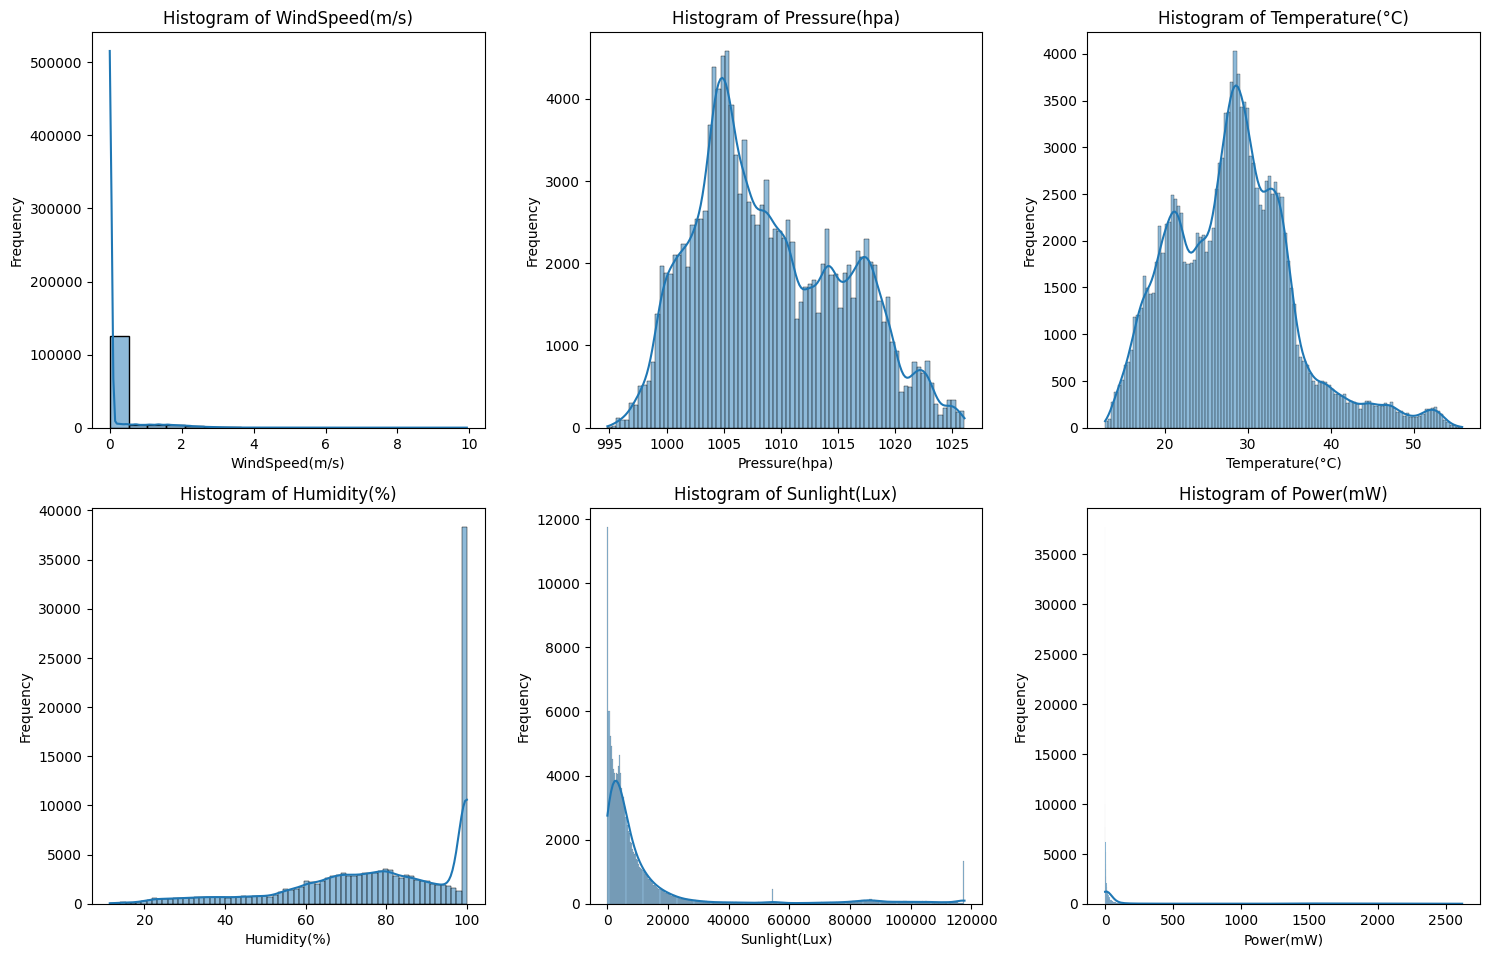

In [ ]:
# 繪製直方圖
use_columns = df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)' ,'Power(mW)']]
plt.figure(figsize=(15, 14))
for i , columns in enumerate(use_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[columns] , kde=True)
    plt.title("Histogram of {}".format(columns))
    plt.xlabel(columns)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
# 篩選Sunlight(Lux)最大值
max_sunlight = df['Sunlight(Lux)'].max()
df_filtered = df[df['Sunlight(Lux)'] == max_sunlight]
df_filtered

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
339,8,2024-01-06 12:09:19.000,0.0,1014.77,23.15,48.76,117758.2,213.03
340,8,2024-01-06 12:10:19.000,0.0,1014.80,23.17,48.93,117758.2,1224.07
341,8,2024-01-06 12:11:19.000,0.0,1014.80,23.76,48.36,117758.2,2084.89
342,8,2024-01-06 12:12:19.000,0.0,1014.80,24.94,47.11,117758.2,2077.60
343,8,2024-01-06 12:13:19.000,0.0,1014.81,26.47,43.60,117758.2,2048.59
...,...,...,...,...,...,...,...,...
138093,8,2024-10-27 12:24:30.000,0.0,1002.84,44.54,35.63,117758.2,1936.18
138094,8,2024-10-27 12:25:30.000,0.0,1002.80,45.41,34.88,117758.2,1873.70
138095,8,2024-10-27 12:26:30.000,0.0,1002.76,46.20,33.73,117758.2,1825.74
138919,8,2024-10-29 11:54:26.000,0.0,1006.13,38.71,52.69,117758.2,1963.58


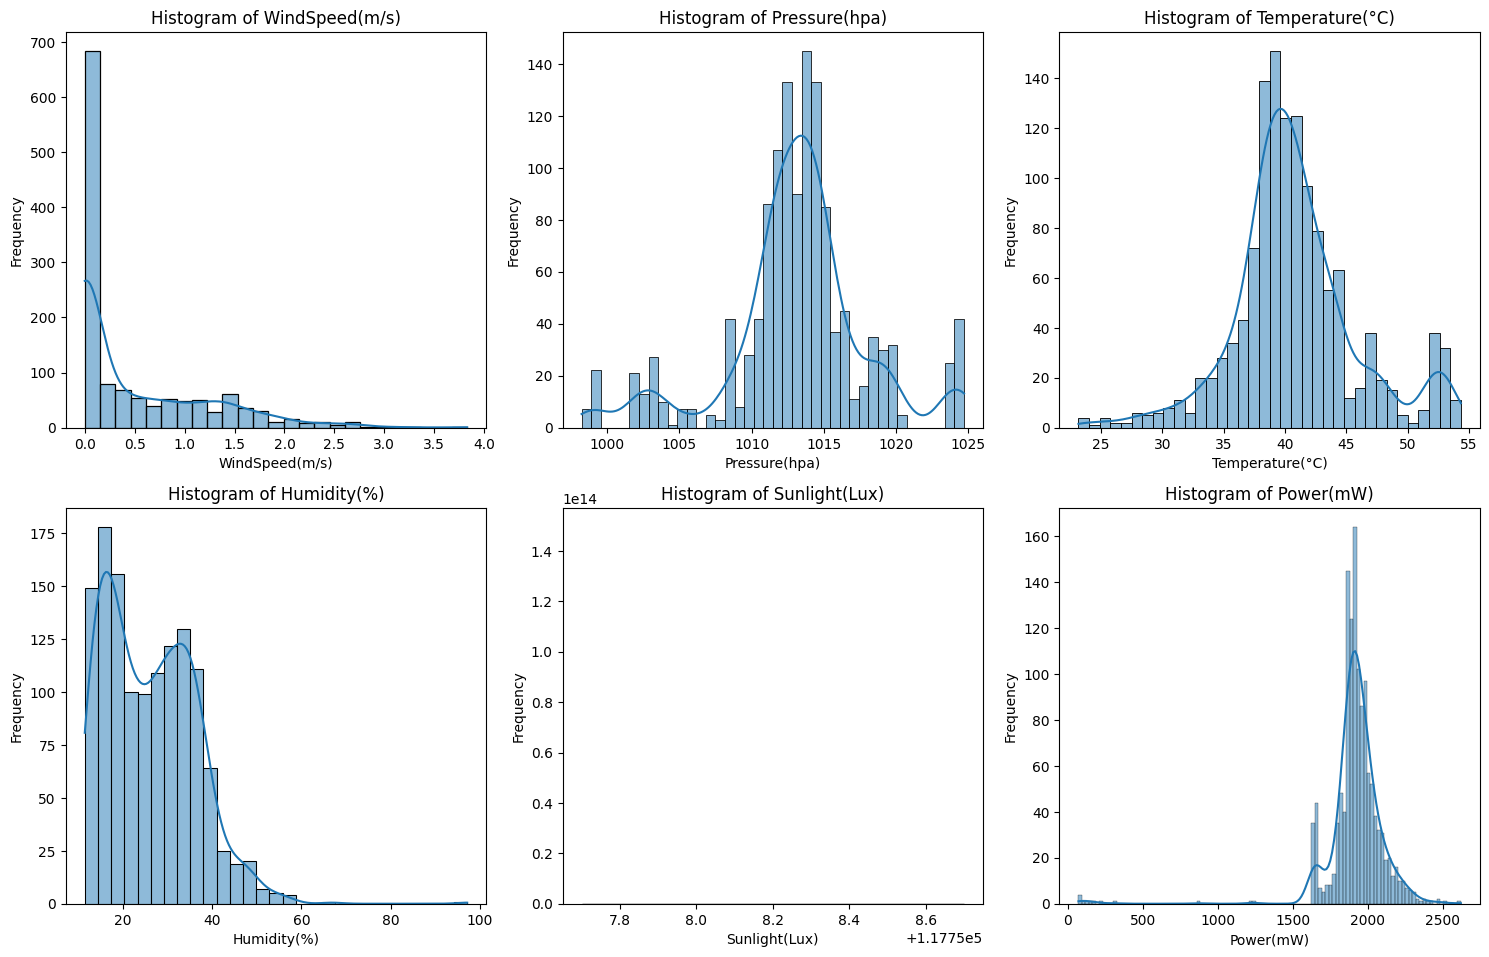

In [ ]:
# 繪製直方圖
use_columns = df_filtered[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)' ,'Power(mW)']]
plt.figure(figsize=(15, 14))
for i , columns in enumerate(use_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_filtered[columns] , kde=True)
    plt.title("Histogram of {}".format(columns))
    plt.xlabel(columns)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [14]:
# 利用迴歸分析先分析Sunlight(Lux)數值尚未達到最大值前的Sunlight(Lux)對Power(mW)的比率，回推Power(mW)所產生的Sunlight(Lux)
from sklearn.linear_model import LinearRegression

# 步驟 1：篩選資料（過濾 Sunlight(Lux) 未達到最大值的數據）
max_sunlight = df['Sunlight(Lux)'].max()
df_filtered = df[df['Sunlight(Lux)'] < max_sunlight]

# 步驟 2：設定自變數與因變數
X = df_filtered[['Sunlight(Lux)']]  # 自變數 (Sunlight)
y = df_filtered['Power(mW)']        # 因變數 (Power)

# 步驟 3：建立線性迴歸模型並進行訓練
model = LinearRegression()
model.fit(X, y)

# 顯示迴歸係數和截距
slope = model.coef_[0]
intercept = model.intercept_

print(f'回歸方程：Power(mW) = {slope:.4f} * Sunlight(Lux) + {intercept:.4f}')

回歸方程：Power(mW) = 0.0161 * Sunlight(Lux) + -75.1804


In [15]:
def calculate_sunlight(power):
    sunlight = (power - intercept) / slope
    return sunlight
slope = 0.0161
intercept = -75.1804

# 複製df_filtered
df_filtered = df[df['Sunlight(Lux)'] == df['Sunlight(Lux)'].max()].copy()

# 使用 .loc 指定修改列中的欄位，回推Sunlight(Lux)
df_filtered['Recalculated Sunlight(Lux)'] = df_filtered['Power(mW)'].apply(calculate_sunlight)

# 更新原始df中的Sunlight(Lux)欄位
df.loc[df_filtered.index, 'Sunlight(Lux)'] = df_filtered['Recalculated Sunlight(Lux)']
# df

In [16]:
df.describe()

,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,139670.0,139670.000000,139670.000000,139670.000000,139670.000000,139670.000000,139670.000000
mean,8.0,0.170716,1009.077270,28.101626,77.986314,13386.006075,139.854735
std,0.0,0.524004,6.470445,7.337354,20.764052,24550.031879,412.244931
min,8.0,0.000000,994.820000,12.790000,11.430000,20.000000,0.000000
25%,8.0,0.000000,1004.170000,22.540000,65.730000,1975.830000,0.770000
50%,8.0,0.000000,1007.880000,28.110000,80.620000,4979.170000,5.750000
75%,8.0,0.000000,1014.180000,32.350000,100.000000,11075.000000,28.100000
max,8.0,9.930000,1026.100000,55.800000,100.000000,167410.583851,2620.130000


In [17]:
df['LocationCode'] = df['LocationCode'].apply(lambda x: f'{x:02d}')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S.%f')

# 提取日期時間的相關特徵
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute
df['Second'] = df['DateTime'].dt.second
df['Weekday'] = df['DateTime'].dt.weekday

df['DateTime'] = df['Year'].astype(str).str.zfill(4) + \
                    df['Month'].astype(str).str.zfill(2) + \
                    df['Day'].astype(str).str.zfill(2) + \
                    df['Hour'].astype(str).str.zfill(2) + \
                    df['Minute'].astype(str).str.zfill(2) + \
                    df['Second'].astype(str).str.zfill(2)
df = df.drop(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second' ,'Weekday'], axis=1)
df['DateTime'] = df['DateTime'].astype('int64')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y%m%d%H%M%S')

# 每10筆資料合併成一筆並計算平均值
# 使用 `groupby` 和 `agg` 方法
df = df.groupby(df.index // 10).agg({
    'LocationCode': 'first',  # 取第一筆的 LocationCode
    'DateTime': 'first',  # 取第一筆的 DateTime
    'WindSpeed(m/s)': 'mean',
    'Pressure(hpa)': 'mean',
    'Temperature(°C)': 'mean',
    'Humidity(%)': 'mean',
    'Sunlight(Lux)': 'mean',
    'Power(mW)': 'mean',
}).reset_index(drop=True)

df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']] = df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']].round(2)

# 將 DateTime 列轉換回原格式
df['DateTime'] = df['DateTime'].dt.strftime('%Y%m%d%H%M%S')

In [18]:
# 將 LocationCode 轉換為字符串
df['LocationCode'] = df['LocationCode'].astype(str)

# 修改 DateTime 的最後兩位數為 LocationCode 的值
df['DateTime'] = df['DateTime'].str.slice(0, -2) + df['LocationCode']

df = df.rename(columns={'DateTime': 'Serial'}) #　序號
df['Serial'] = df['Serial'].astype('int64')
df = df.drop(['LocationCode'], axis=1)
df

,Serial,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,20240106062108,0.05,1016.07,14.61,81.06,49.42,0.00
1,20240106063108,0.00,1016.15,14.59,81.06,208.67,0.00
2,20240106064308,0.00,1016.44,14.59,81.09,575.25,0.03
3,20240106065608,0.00,1016.58,14.46,82.02,1012.83,0.10
4,20240106070608,0.00,1016.59,14.43,82.26,1464.08,0.23
...,...,...,...,...,...,...,...
13962,20241030134108,0.00,1002.24,31.44,100.00,7200.92,14.13
13963,20241030135108,0.00,1002.12,30.04,100.00,8438.08,18.55
13964,20241030140108,0.00,1002.03,29.61,100.00,4675.17,5.56
13965,20241030141108,0.00,1001.97,29.06,100.00,3285.25,2.64


# HEATMAP

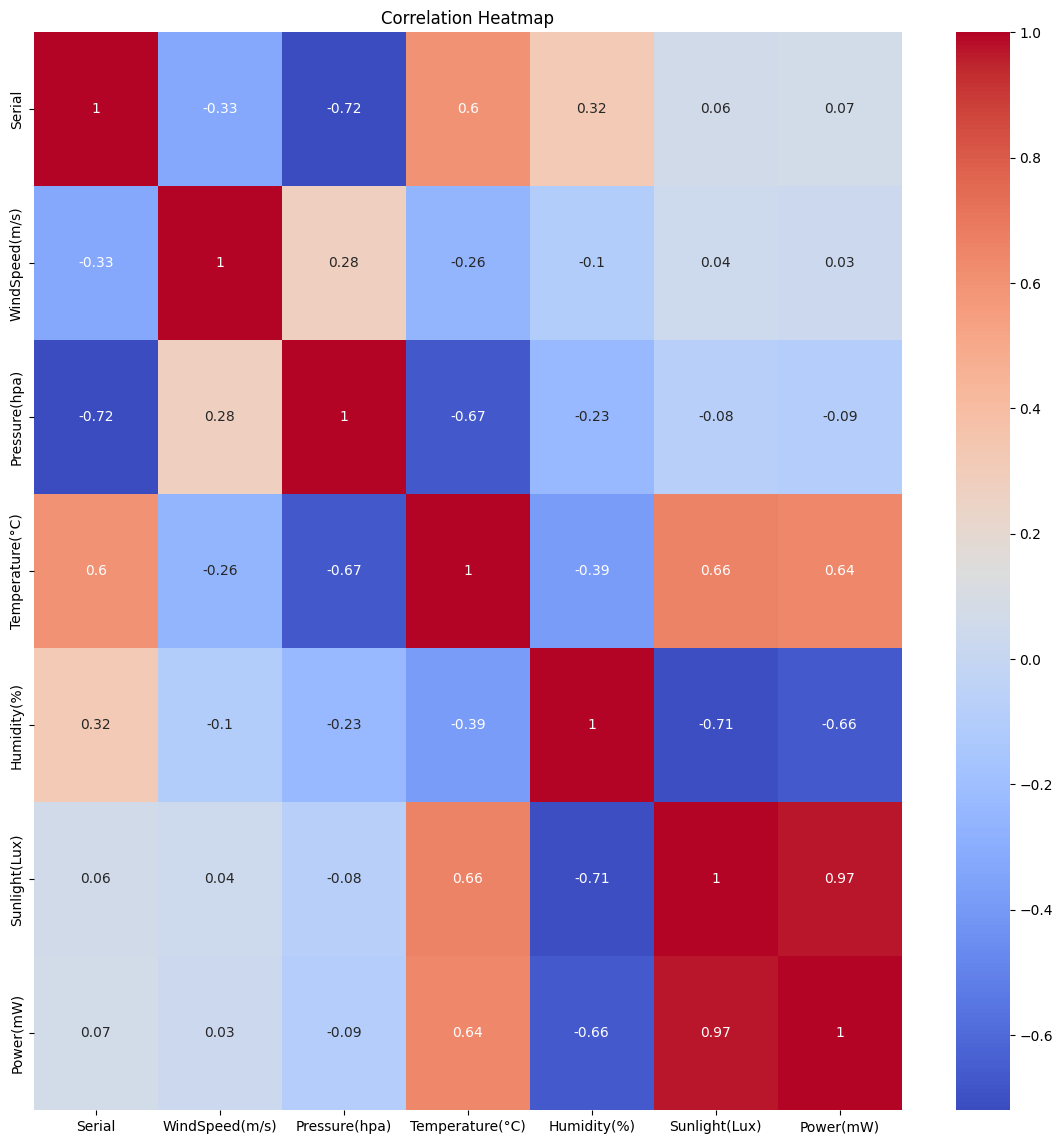

In [ ]:
# 繪製熱力圖
plt.figure(figsize=(14, 14))

corr_matrix = df.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# 相關性絕對值
correlation = df.corr().abs()
top_10_features = correlation['Power(mW)'].sort_values(ascending=False).head(11)
top_10_features

Power(mW)          1.000000
Sunlight(Lux)      0.965505
Humidity(%)        0.664921
Temperature(°C)    0.640463
Pressure(hpa)      0.093895
Serial             0.071885
WindSpeed(m/s)     0.031624
Name: Power(mW), dtype: float64

In [21]:
df.to_csv('L8_Train_Revise.csv', index=False)